# Simulated STDP protocol with spiking LPL - Figure 6

This notebook contains example code to analyze the STDP protocol data. Please first run
```
./sweep_stdp_long.sh 
./sweep_stdp.sh
```
to generate the data.

The first command runs a simulation with a long inter-spike interval to generate the STDP curve plots. The second command runs a simulation with different firing rates to generate the rate dependence of STDP plots.
The simulations are run for several different initial values of the mean spiking rate and variance of the spiking rate, but we show plots for only the values used in the paper.

The data is all stored in `~/data/lpl/stdp` by default.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter
import sys, os
import seaborn as sns

from scipy.sparse import *
from scipy.io import mmread

In [2]:
outputdir = os.path.expanduser("~/data/lpl/plots/fig_stdp")
os.makedirs(outputdir, exist_ok=True)

In [3]:
# Should match the values we have in sweep_stdp_long.sh
means = [0, 5, 10, 12, 15, 20, 30]
sig2s = [0.0, 0.001, 0.005, 0.01, 0.1, 0.2, 1.0, 100]
freqs = [10]
# 0.0 0.001 0.005 0.01 0.1 0.2

basepath = os.path.expanduser("~/data/lpl/stdp/")
time_delta = 50e-3
deltats = np.linspace(time_delta,-time_delta,100) # we associate each input neuron with a different relative firing time
# positive firing times correspond to causal pairings

In [4]:
def reldw(w, w0=0.5):
    return (w-w0)/w0

In [5]:
# Load plasticity outcomes into memory
data = np.empty((len(means),len(sig2s),len(freqs),len(deltats)))
for i,mean in enumerate(means):
    for j,sig2 in enumerate(sig2s):
        for k,freq in enumerate(freqs):
            filename = "input_con_mean-%g_sigma2-%s_fr-%g_long.wmat"%(mean,str(sig2),freq)
            # print(filename)
            A = mmread("%s/%s"%(basepath,filename))
            w = A.todense().ravel()
            data[i,j,k] = w

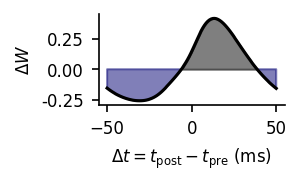

In [6]:
plt.figure(figsize=(1.6,0.8), dpi=150)
plt.plot(deltats/1e-3, reldw(data[2,4,0]), color="black")
plt.fill_between(deltats/1e-3, reldw(data[2,4,0]), where=(reldw(data[2,4,0])<0), color='#020072', alpha=0.5)
plt.fill_between(deltats/1e-3, reldw(data[2,4,0]), where=(reldw(data[2,4,0])>=0), color='black', alpha=0.5)
plt.xlabel("$\Delta t = t_\mathrm{post}-t_\mathrm{pre}$ (ms)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
# plt.title("$\sigma^2=1$", fontsize=10)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
sns.despine()

plt.savefig(os.path.join(outputdir,'stdp_plot_sigma2_0.pdf'), bbox_inches='tight')

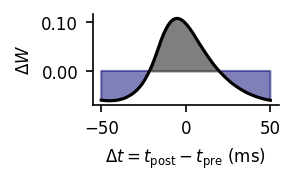

In [7]:
plt.figure(figsize=(1.6,0.8), dpi=150)
plt.plot(deltats/1e-3, reldw(data[2,-2,0]), color="black")
plt.fill_between(deltats/1e-3, reldw(data[2,-2,0]), where=(reldw(data[2,-2,0])<0), color='#020072', alpha=0.5)
plt.fill_between(deltats/1e-3, reldw(data[2,-2,0]), where=(reldw(data[2,-2,0])>=0), color='black', alpha=0.5)
plt.xlabel("$\Delta t = t_\mathrm{post}-t_\mathrm{pre}$ (ms)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
# plt.title("$\sigma^2=0$", fontsize=10)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
sns.despine()

plt.savefig(os.path.join(outputdir,'stdp_plot_sigma2_1.pdf'), bbox_inches='tight')

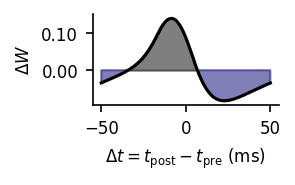

In [8]:
plt.figure(figsize=(1.6,0.8), dpi=150)
plt.plot(deltats/1e-3, reldw(data[2,-1,0]), color="black")
plt.fill_between(deltats/1e-3, reldw(data[2,-1,0]), where=(reldw(data[2,-1,0])<0), color='#020072', alpha=0.5)
plt.fill_between(deltats/1e-3, reldw(data[2,-1,0]), where=(reldw(data[2,-1,0])>=0), color='black', alpha=0.5)
plt.xlabel("$\Delta t = t_\mathrm{post}-t_\mathrm{pre}$ (ms)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
# plt.title("$\sigma^2=0$", fontsize=10)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
sns.despine()

plt.savefig(os.path.join(outputdir,'stdp_plot_sigma2_100.pdf'), bbox_inches='tight')

In [9]:
time_delta = 20e-3
deltats = np.linspace(time_delta,-time_delta,100) # we associate each input neuron with a different relative firing time

In [10]:
# Load plasticity outcomes into memory
freqs = [0.1, 1, 10, 20, 30, 40, 50]
data_freq = np.empty((len(freqs),len(deltats)))
for k,freq in enumerate(freqs):
    filename = "input_con_%ghz.0.wmat"%(freq)
    A = mmread("%s/%s"%(basepath,filename))
    w = A.todense().ravel()
    data_freq[k] = w

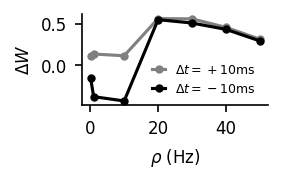

In [11]:
plt.figure(figsize=(1.6,0.8), dpi=150)

plt.plot(freqs, reldw(data_freq[:,25]), label="$\Delta t=+10\mathrm{ms}$", marker='.', color='gray')
plt.plot(freqs, reldw(data_freq[:,75]), label="$\Delta t=-10\mathrm{ms}$", marker='.', color='k')
    
plt.xlabel(r"$\rho$"+" (Hz)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
plt.legend(fontsize=6, frameon=False, handlelength=1, loc=(0.35,0.05))
sns.despine()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
# plt.tight_layout()

plt.savefig(os.path.join(outputdir,"stdp_rate_dependence.pdf"), bbox_inches='tight')

In [12]:
# Should match the values we have in sweep_stdp.sh
means = [0, 20, 50]
sig2s = [0.1]
freqs = [0.1, 1, 10, 20, 30, 40, 50]
# 0.0 0.001 0.005 0.01 0.1 0.2

time_delta = 20e-3
deltats = np.linspace(time_delta,-time_delta,100) # we associate each input neuron with a different relative firing time
# positive firing times correspond to causal pairings

In [13]:
# Load plasticity outcomes into memory
data = np.empty((len(means),len(sig2s),len(freqs),len(deltats)))
for i,mean in enumerate(means):
    for j,sig2 in enumerate(sig2s):
        for k,freq in enumerate(freqs):
            filename = "input_con_mean-%g_sigma2-%.1f_fr-%g.wmat"%(mean,sig2,freq)
            A = mmread("%s/%s"%(basepath,filename))
            w = A.todense().ravel()
            data[i,j,k] = w

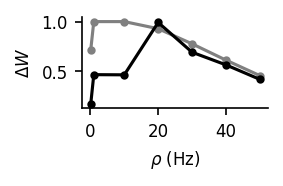

In [14]:
plt.figure(figsize=(1.6,0.8), dpi=150)

plt.plot(freqs, reldw(data[0, 0, :, 25]), label="$\Delta t=+10\mathrm{ms}$", marker='.', color='gray')
plt.plot(freqs, reldw(data[0, 0, :, 75]), label="$\Delta t=-10\mathrm{ms}$", marker='.', color='k')
    
plt.xlabel(r"$\rho$"+" (Hz)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
# plt.legend(fontsize=6, frameon=False, handlelength=1, loc=(0.35,0.05))
sns.despine()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.set_major_formatter(FormatStrFormatter("%2.1f"))
# plt.tight_layout()

plt.savefig(os.path.join(outputdir,"suppl_stdp_low_rate.pdf"), bbox_inches='tight')

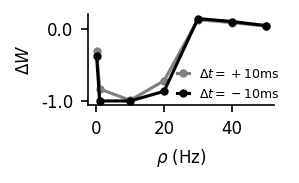

In [15]:
plt.figure(figsize=(1.6,0.8), dpi=150)

plt.plot(freqs, reldw(data[2, 0, :, 25]), label="$\Delta t=+10\mathrm{ms}$", marker='.', color='gray')
plt.plot(freqs, reldw(data[2, 0, :, 75]), label="$\Delta t=-10\mathrm{ms}$", marker='.', color='k')
    
plt.xlabel(r"$\rho$"+" (Hz)", fontsize=8)
plt.ylabel("$\Delta W$", fontsize=8)
plt.legend(fontsize=6, frameon=False, handlelength=1, loc=(0.45,0.))
sns.despine()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.set_major_formatter(FormatStrFormatter("%2.1f"))
# plt.tight_layout()

plt.savefig(os.path.join(outputdir,"suppl_stdp_high_rate.pdf"), bbox_inches='tight')